In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/AS20505657/Documents/Dataset/titanic.csv')

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.shape

(887, 8)

In [5]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [7]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [8]:
df.value_counts('Pclass')

Pclass
3    487
1    216
2    184
Name: count, dtype: int64

In [9]:
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [10]:
df = df.drop(['Name'], axis=1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
df = pd.get_dummies(df, columns=['Sex'])

In [13]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,True,False
3,1,1,35.0,1,0,53.1000,True,False
4,0,3,35.0,0,0,8.0500,False,True


In [14]:
df['Sex_female'] = df['Sex_female'].astype(int)

In [15]:
df['Sex_male'] = df['Sex_male'].astype(int)

In [16]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [17]:
df['Parents/Children Aboard'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [19]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542,0.354002,0.645998
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480,0.478480
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000,1.000000


In [20]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale the data
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [24]:
rf_classifier = RandomForestClassifier(max_depth=6,random_state=42)

In [25]:
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, random_state=42)

In [26]:
y_pred_rf = rf_classifier.predict(X_test_scaled)

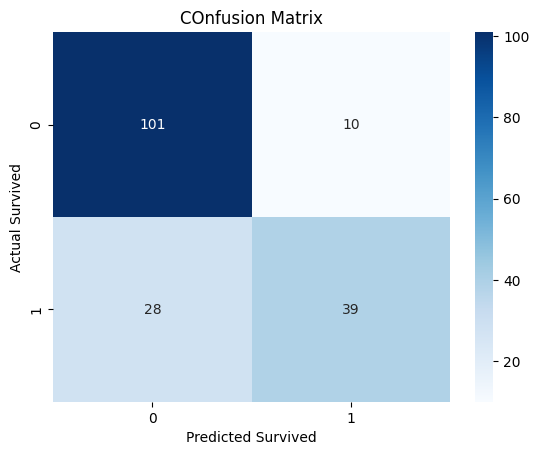

In [31]:
conf_matrix = confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Survived')
plt.ylabel('Actual Survived')
plt.title('COnfusion Matrix')
plt.show()

In [30]:
accuracy = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print('accuracy : {}'.format(accuracy))
print('recall : {}'.format(recall))
print('precision : {}'.format(precision))
print('f1_score : {}'.format(f1))

accuracy : 0.7865168539325843
recall : 0.582089552238806
precision : 0.7959183673469388
f1_score : 0.6724137931034483
